In [1]:
import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
df=pd.read_csv("Alphabets_data.csv")

In [3]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [7]:
df.duplicated().sum()

1332

<Axes: ylabel='Frequency'>

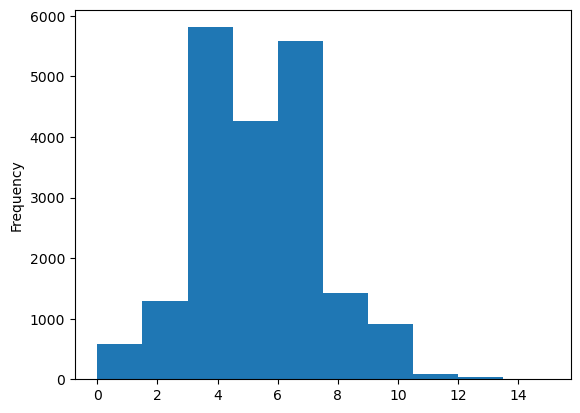

In [8]:
df["width"].plot(kind="hist")

In [9]:
df.letter.value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

In [10]:
X = df.drop('letter', axis=1).values  # Features
y = df['letter'].values  # Labels

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
y = LabelEncoder().fit_transform(y)
# One-hot encode labels
y = to_categorical(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = Sequential()

# Input layer
model.add(Dense(128, input_shape=(X_train.shape[1],), activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(32, activation='relu'))

# Output layer (number of classes should match the number of unique labels in the dataset)
model.add(Dense(y_train.shape[1], activation='softmax'))


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=50, validation_split=0.2)

Epoch 1/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0982 - loss: 3.2655 - val_accuracy: 0.4584 - val_loss: 1.9195
Epoch 2/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3935 - loss: 1.9972 - val_accuracy: 0.6431 - val_loss: 1.3072
Epoch 3/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5000 - loss: 1.5705 - val_accuracy: 0.6891 - val_loss: 1.1130
Epoch 4/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5496 - loss: 1.4099 - val_accuracy: 0.6975 - val_loss: 1.0341
Epoch 5/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5892 - loss: 1.3053 - val_accuracy: 0.7366 - val_loss: 0.9004
Epoch 6/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6090 - loss: 1.2076 - val_accuracy: 0.7362 - val_loss: 0.8765
Epoch 7/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6259 - loss: 1.1680 - val_accuracy: 0.7509 - val_loss: 0.8325
Epoch 8/50
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6598 - loss: 1.0798 - val_accuracy: 0.

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {round(test_accuracy,2)}')


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9007 - loss: 0.3359
Test Accuracy: 0.9


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


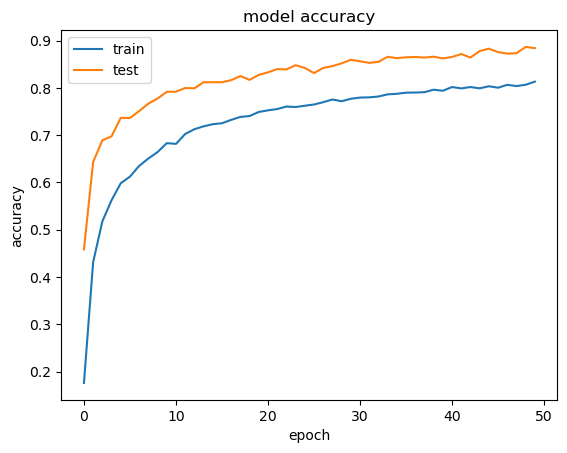

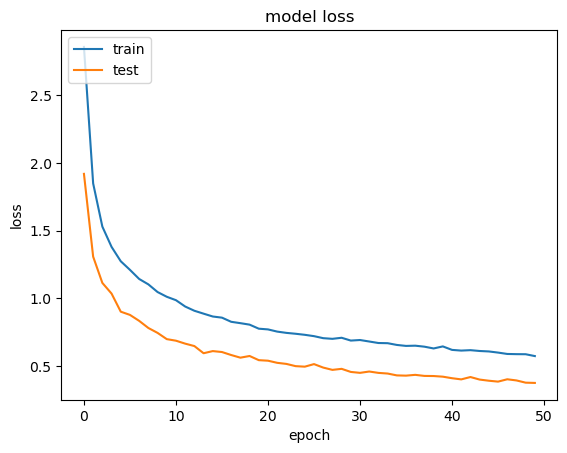

In [17]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# !pip install scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [19]:
def create_model(optimizer='adam', dropout_rate=0.5, neurons=128):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [20]:
model = KerasClassifier(model=create_model, verbose=0)

In [21]:
# model__my_param=123

param_grid = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'model__optimizer': ['adam', 'rmsprop'],
    'model__dropout_rate': [0.3, 0.5, 0.7],
    'model__neurons': [64, 128, 256]
}

In [22]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)


C:\Users\DELL\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, std, param in zip(means, stds, params):
    print(f"{mean:.4f} (+/- {std:.4f}) with: {param}")


Best: 0.9372498276455364 using {'batch_size': 32, 'epochs': 100, 'model__dropout_rate': 0.3, 'model__neurons': 256, 'model__optimizer': 'adam'}
0.9076 (+/- 0.0041) with: {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__neurons': 64, 'model__optimizer': 'adam'}
0.8678 (+/- 0.0072) with: {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__neurons': 64, 'model__optimizer': 'rmsprop'}
0.9122 (+/- 0.0066) with: {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__neurons': 128, 'model__optimizer': 'adam'}
0.8670 (+/- 0.0102) with: {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__neurons': 128, 'model__optimizer': 'rmsprop'}
0.9236 (+/- 0.0036) with: {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__neurons': 256, 'model__optimizer': 'adam'}
0.8893 (+/- 0.0038) with: {'batch_size': 16, 'epochs': 50, 'model__dropout_rate': 0.3, 'model__neurons': 256, 'model__optimizer': 'rmsprop'}
0.8774 (+/- 0.0049) w

In [24]:
# model.get_params().keys()

In [27]:
y.shape

(20000, 26)

In [28]:
best_model = create_model(optimizer="adam" , dropout_rate=0.3 ,neurons=256)

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
history = best_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1393 - loss: 2.9735 - val_accuracy: 0.5128 - val_loss: 1.6147
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4603 - loss: 1.6986 - val_accuracy: 0.6728 - val_loss: 1.1707
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5731 - loss: 1.3337 - val_accuracy: 0.7197 - val_loss: 1.0009
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6195 - loss: 1.1867 - val_accuracy: 0.7450 - val_loss: 0.8911
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6565 - loss: 1.0722 - val_accuracy: 0.7713 - val_loss: 0.8049
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6819 - loss: 0.9904 - val_accuracy: 0.7881 - val_loss: 0.7077
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6993 - loss: 0.9266 - val_accuracy: 0.7825 - val_loss: 0.6986
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7168 - loss: 0.8777 - val_accu

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8983 - loss: 0.3246 - val_accuracy: 0.9194 - val_loss: 0.2598
Epoch 52/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9015 - loss: 0.3020 - val_accuracy: 0.9281 - val_loss: 0.2375
Epoch 53/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9025 - loss: 0.2912 - val_accuracy: 0.9325 - val_loss: 0.2190
Epoch 54/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8971 - loss: 0.3132 - val_accuracy: 0.9309 - val_loss: 0.2274
Epoch 55/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9011 - loss: 0.2939 - val_accuracy: 0.9353 - val_loss: 0.2112
Epoch 56/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8981 - loss: 0.2927 - val_accuracy: 0.9309 - val_loss: 0.2131
Epoch 57/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9034 - loss: 0.2768 - val_accuracy: 0.9372 - val_loss: 0.1996
Epoch 58/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9071 - loss: 0.2687 - val_accuracy:

In [30]:
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {round(test_accuracy,2)}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9448 - loss: 0.1781
Test Accuracy: 0.94


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


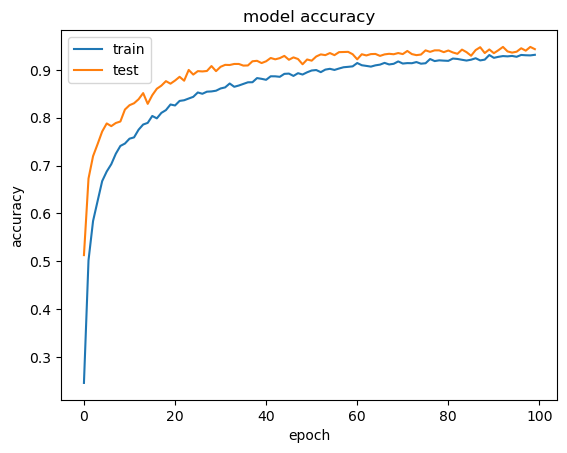

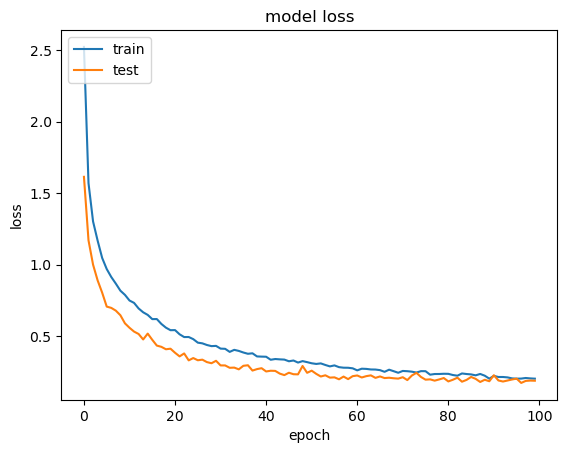

In [31]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()